<a href="https://colab.research.google.com/github/aida-hm/Udacity/blob/main/MNIST_Handwritten_Digits_STARTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory.
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [ ]:
# Install requirements
!python -m pip install --upgrade pip
!pip install opencv-python-headless==4.5.5.64
!pip install --upgrade ipywidgets widgetsnbextension
!jupyter nbextension enable --py widgetsnbextension
!pip install --upgrade jupyter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.0 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Fo

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
batch_size=64
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Create training set and define training dataloader
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform,
)
train_loader = DataLoader(training_data, batch_size, shuffle=True)

# Create validation set and define validation dataloader
validation_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform,
)
validation_loader = DataLoader(validation_data, batch_size, shuffle=True)

# Create test set and define test dataloader
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform,
)
test_loader = DataLoader(test_data, batch_size, shuffle=True)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

ToTensor() converts each image to a tensor vector.  
Normalize((0.5,)(0.5,)) normalizes the input data by subtracting the mean(set to 0.5) and dividing by the standard deviation(set to 0.5) to center the data around zero and reduce the variance

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

2


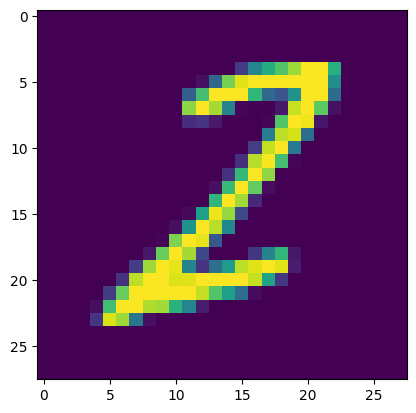

6


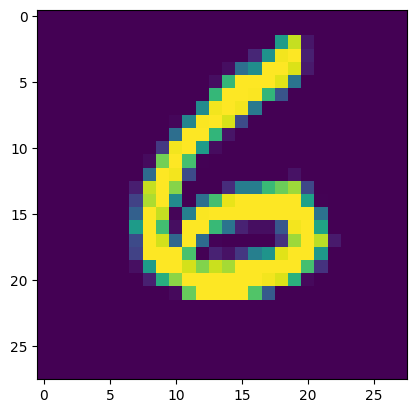

9


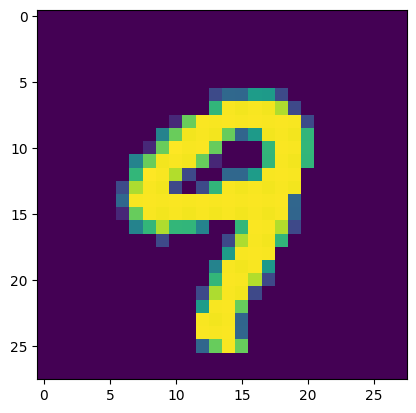

7


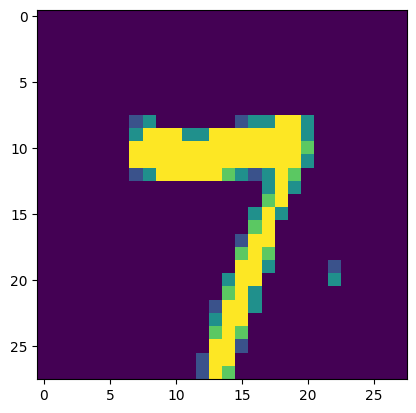

1


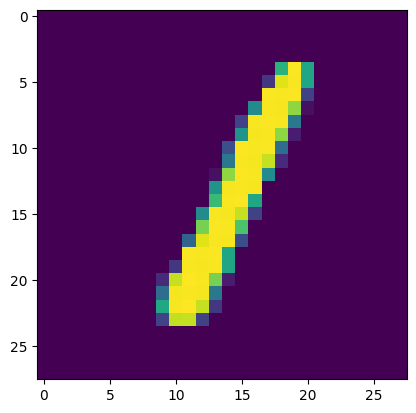

In [6]:
# Explore data
show5(train_loader)

In [7]:
print(training_data.data.shape)
print(validation_data.data.shape)
print(test_data.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
torch.Size([10000, 28, 28])


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [8]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28 * 28, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = torch.flatten(x, 1) # flatten all dimensions except batch
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [9]:
net = Net()
net.to(device)

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [10]:
train_losses = []
train_accuracies = []
test_accuracies = []
validatin_losses = []
validation_accuracies = []

def train_model(model, criterion, optimizer, num_epochs):
  iter = 0
  for epoch in range(num_epochs):
    train_loss = 0.0
    train_correct = 0
    validation_loss = 0.0
    validation_correct = 0

    # Set the model in training mode
    net.train()
    # Iterate over the DataLoader for training data
    for i, (inputs, labels) in enumerate(train_loader):
      # Move tensors to the configured device
      inputs, labels = inputs.to(device), labels.to(device)
      # Set gradients to zero
      inputs = inputs.requires_grad_()
      # Clear gradients w.r.t. parameters
      optimizer.zero_grad()
      # Forward pass to get output/logits
      outputs = net(inputs)
      # Calculate Loss
      loss = criterion(outputs, labels)
      # Getting gradients w.r.t. parameters
      loss.backward()
      # Updating parameters
      optimizer.step()
      # Total loss
      train_loss += loss.item()
      # Get predictions
      _, predicted = torch.max(outputs.data, 1)
      # Total correct predictions
      train_correct += (predicted == labels).float().mean().item()

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_loader):.5f}, Train Accuracy: {train_correct/len(train_loader)*100:.2f}%')
    train_losses.append(train_loss/len(train_loader))
    train_accuracies.append(train_correct/len(train_loader)*100)

    for inputs, labels in validation_loader:
      # Move tensors to the configured device
      inputs, labels = inputs.to(device), labels.to(device)
      # Forward pass to get output/logits
      outputs = net(inputs)
      # Calculate Loss
      loss = criterion(outputs, labels)
      # Total loss
      validation_loss += loss.item()
      # Get predictions
      _, predicted = torch.max(outputs.data, 1)
      # Total correct predictions
      validation_correct += (predicted == labels).float().mean().item()
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {validation_loss/len(validation_loader):.5f}, Validation Accuracy: {validation_correct/len(validation_loader)*100:.2f}%')
    validatin_losses.append(validation_loss/len(validation_loader))
    validation_accuracies.append(validation_correct/len(validation_loader)*100)

train_model(net, criterion, optimizer, num_epochs=20)

Epoch 1/20, Train Loss: 1.10588, Train Accuracy: 69.44%
Epoch 1/20, Validation Loss: 0.42617, Validation Accuracy: 88.09%
Epoch 2/20, Train Loss: 0.38536, Train Accuracy: 88.99%
Epoch 2/20, Validation Loss: 0.33003, Validation Accuracy: 90.33%
Epoch 3/20, Train Loss: 0.32719, Train Accuracy: 90.53%
Epoch 3/20, Validation Loss: 0.29148, Validation Accuracy: 91.72%
Epoch 4/20, Train Loss: 0.29678, Train Accuracy: 91.28%
Epoch 4/20, Validation Loss: 0.27670, Validation Accuracy: 91.74%
Epoch 5/20, Train Loss: 0.27342, Train Accuracy: 91.91%
Epoch 5/20, Validation Loss: 0.25583, Validation Accuracy: 92.71%
Epoch 6/20, Train Loss: 0.25256, Train Accuracy: 92.65%
Epoch 6/20, Validation Loss: 0.23815, Validation Accuracy: 92.98%
Epoch 7/20, Train Loss: 0.23284, Train Accuracy: 93.17%
Epoch 7/20, Validation Loss: 0.21614, Validation Accuracy: 93.66%
Epoch 8/20, Train Loss: 0.21390, Train Accuracy: 93.81%
Epoch 8/20, Validation Loss: 0.20607, Validation Accuracy: 93.91%
Epoch 9/20, Train Loss: 

Plot the training loss (and validation loss/accuracy, if recorded).

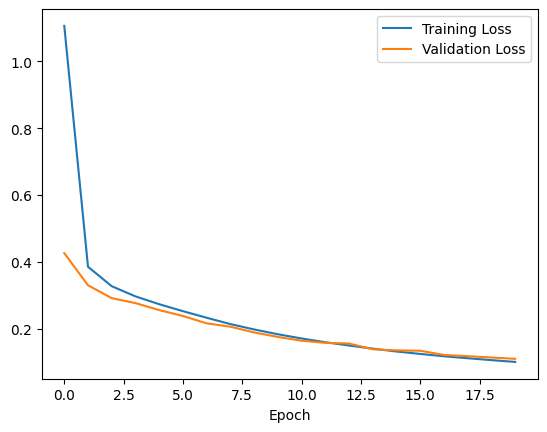

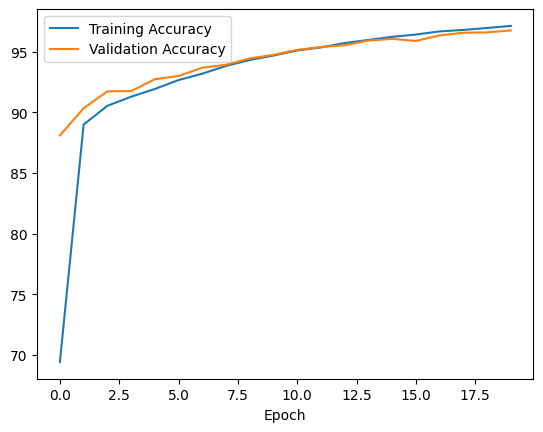

In [11]:
plt.plot(train_losses, label='Training Loss')
plt.plot(validatin_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [12]:
def check_accuracy(loader, model):
  # Set the model in evaluation mode
  net.eval()
  test_correct = 0
  with torch.no_grad():
    # Iterate over the DataLoader for test data
    for inputs, labels in test_loader:
      # Move tensors to the configured device
      inputs, labels = inputs.to(device), labels.to(device)
      # Forward pass to get output/logits
      outputs = net(inputs)
      # Get predictions
      _,predicted = outputs.max(1)
      # Total correct predictions
      test_correct += (predicted == labels).float().mean().item()
    print(f'Test Accuracy: {test_correct/len(test_loader)*100:.2f}%')
  net.train()
check_accuracy(test_loader, net)

Test Accuracy: 96.77%


Predicted Digit = 2
Actual Label = 2
Probability = 5738569000000.0
List of Probabilities = [0.022159178, 7613.029, 5738569000000.0, 6685313.0, 2.6567846e-13, 4.771108e-05, 1.3033211e-07, 28546140.0, 1372.8435, 0.0037271993]


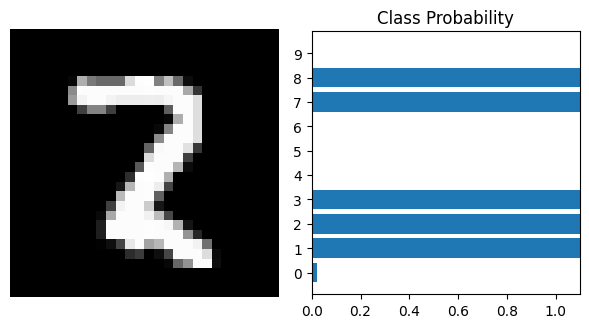

In [17]:
inputs, labels = next(iter(test_loader))
img = inputs[0].view(1, 784)
with torch.no_grad():
    output = net(img.cuda())
ps = torch.exp(output)
probab = list((ps.cpu().data.numpy().squeeze()))
print("Predicted Digit =", probab.index(max(probab)))
print("Actual Label =", labels[0].item())
print("Probability =", max(probab))
print("List of Probabilities =", probab)

ps = ps.cpu().data.numpy().squeeze()
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap='gray')
ax1.axis('off')
ax2.barh(np.arange(10), ps)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0,1.1)
plt.tight_layout()

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [14]:
# changing the number of epochs
num_epochs = 30
# changing the learning rate
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
# changing the batch size
batch_size = 128
train_loader = DataLoader(training_data, batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size, shuffle=True)
train_model(net, criterion, optimizer, num_epochs)

Epoch 1/30, Train Loss: 0.12461, Train Accuracy: 96.22%
Epoch 1/30, Validation Loss: 0.11758, Validation Accuracy: 96.43%
Epoch 2/30, Train Loss: 0.09976, Train Accuracy: 96.97%
Epoch 2/30, Validation Loss: 0.10817, Validation Accuracy: 96.67%
Epoch 3/30, Train Loss: 0.08301, Train Accuracy: 97.57%
Epoch 3/30, Validation Loss: 0.10673, Validation Accuracy: 96.75%
Epoch 4/30, Train Loss: 0.07574, Train Accuracy: 97.67%
Epoch 4/30, Validation Loss: 0.09623, Validation Accuracy: 97.16%
Epoch 5/30, Train Loss: 0.06826, Train Accuracy: 97.85%
Epoch 5/30, Validation Loss: 0.07771, Validation Accuracy: 97.54%
Epoch 6/30, Train Loss: 0.06119, Train Accuracy: 98.11%
Epoch 6/30, Validation Loss: 0.08996, Validation Accuracy: 97.24%
Epoch 7/30, Train Loss: 0.05410, Train Accuracy: 98.29%
Epoch 7/30, Validation Loss: 0.09445, Validation Accuracy: 97.07%
Epoch 8/30, Train Loss: 0.04846, Train Accuracy: 98.48%
Epoch 8/30, Validation Loss: 0.07835, Validation Accuracy: 97.56%
Epoch 9/30, Train Loss: 

In [15]:
check_accuracy(test_loader, net)

Test Accuracy: 97.90%


## Saving your model
Using `torch.save`, save your model for future loading.

In [16]:
torch.save(net.state_dict(), 'model.pt')